# 시계열 예측 방법
- 랜덤 포레스트
- 선형 모델
- ARIMA
- MLP
- CNN
- RNN

## 예측 타입
- 단변수 예측
- 멀티스텝 예측
- 다중변수 예측
- 다중변수 멀티스텝 예측


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
# %tensorflow_version 2.x
from keras.layers import Dense
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GRU, LSTM
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, GlobalAveragePooling1D
import keras
from sklearn.metrics import r2_score
import warnings
warnings.simplefilter('ignore')
plt.rcParams['figure.dpi'] = 100

Using TensorFlow backend.


## 데이터 다운로드

In [0]:
!curl -L https://goo.gl/s8qSL5  -o ./bike_train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  643k  100  643k    0     0   516k      0  0:00:01  0:00:01 --:--:-- 16.9M


In [0]:
df = pd.read_csv("bike_train.csv", parse_dates=["datetime"])
df[:3]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## 자전거 대여수 (시계열 데이터)

In [0]:
count = df["count"].values
print(count.shape)

(10886,)


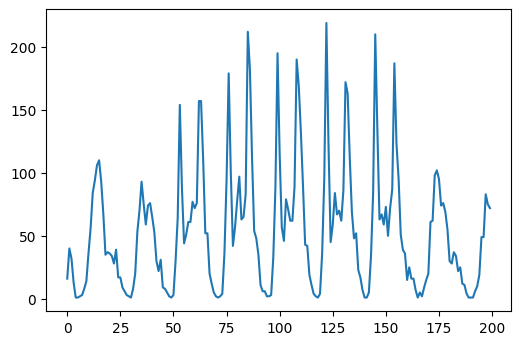

In [0]:
plt.plot(count[:200])

## 모든 특정을 사용한 머신러닝 방법의 성능
- 랜덤 포레스트

## datetime 날짜 데이터 분해

In [0]:
df["d-year"] = df["datetime"].dt.year
df["d-month"] = df["datetime"].dt.month
df["d-day"] = df["datetime"].dt.day
df["d-hour"] = df["datetime"].dt.hour
df["d-dayofweek"] = df["datetime"].dt.dayofweek

df[["datetime", "d-year", "d-month", "d-day", "d-hour","d-dayofweek" ]].head()

,datetime,d-year,d-month,d-day,d-hour,d-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,5
1,2011-01-01 01:00:00,2011,1,1,1,5
2,2011-01-01 02:00:00,2011,1,1,2,5
3,2011-01-01 03:00:00,2011,1,1,3,5
4,2011-01-01 04:00:00,2011,1,1,4,5


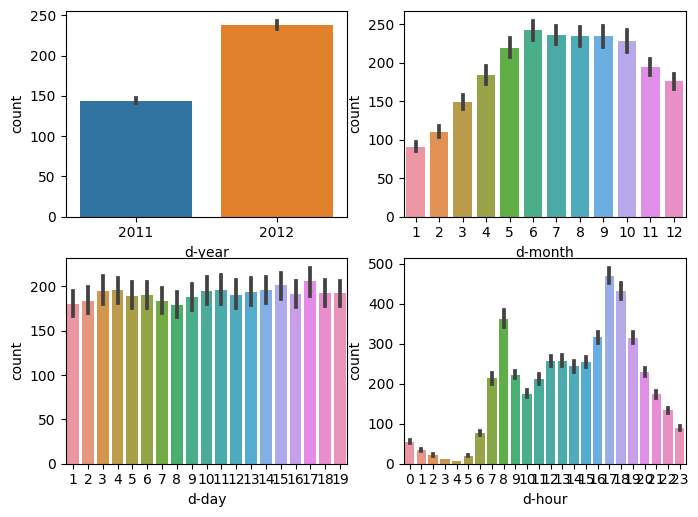

In [0]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
              figsize=(8,6))
sns.barplot(data=df, x="d-year", y="count", ax=ax1)
sns.barplot(data=df, x="d-month", y="count", ax=ax2)
sns.barplot(data=df, x="d-day", y="count", ax=ax3)
sns.barplot(data=df, x="d-hour", y="count", ax=ax4)

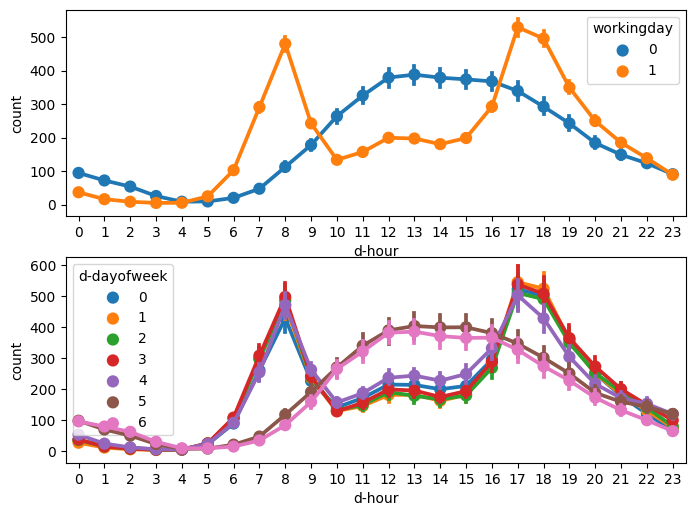

In [0]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(8, 6)

sns.pointplot(data=df, x="d-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=df, x="d-hour", y="count", hue="d-dayofweek", ax=ax2)

## 훈련에 사용할 특성 선택

In [0]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'd-year', 'd-month', 'd-day', 'd-hour', 'd-dayofweek'],
      dtype='object')

In [0]:
features = ["season", "holiday", "workingday", "weather", "temp", "atemp", 
            "humidity", "windspeed", "d-year", "d-hour", "d-dayofweek"]

## 자전거 대여 수

In [0]:
X = df[features]
y = count
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 랜덤포레스트

In [0]:
model = RandomForestRegressor(n_estimators= 100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9443125990219062

## 주요 특성 변수

In [0]:
def feature_importances_fig(features, importances):
    df = pd.DataFrame({'feature':features,'importance':importances})
    df = df.sort_values('importance', ascending=False)
    ypos = np.arange(len(df.feature))

    plt.figure(figsize=(6,4))
    plt.barh(df.feature, df.importance)
    plt.yticks(ypos, df.feature)
    plt.xlabel('Importance')
    plt.ylabel('Variable')
    plt.xlim(0, 1)
    plt.ylim(-1, len(df.feature))
    plt.show()

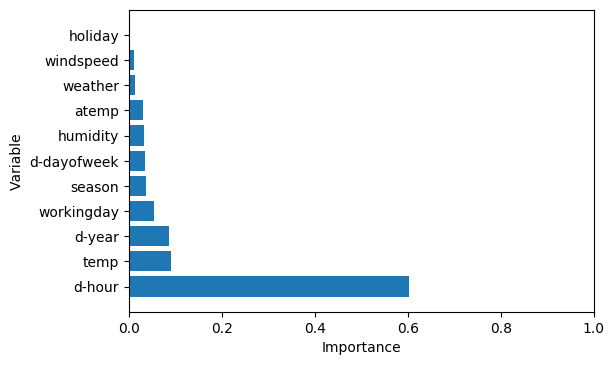

In [0]:
feature_importances_fig(features, model.feature_importances_)

In [0]:
# 실제값과 예측치 비교
def plot_y_pred(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test, c='r')
    plt.plot(y_pred, c='b')
    plt.show()

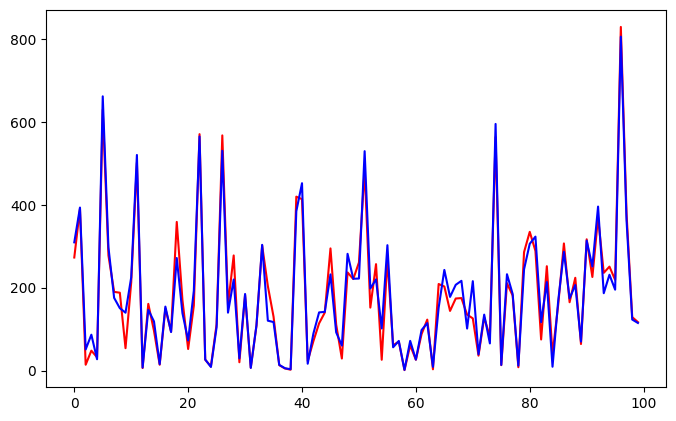

In [0]:
y_pred = model.predict(X_test)
plot_y_pred(y_test[:100], y_pred[:100])

In [0]:
np.vstack((y_test[:10], y_pred[:10])).T

array([[273.  , 309.66],
       [391.  , 393.65],
       [ 14.  ,  50.92],
       [ 48.  ,  86.55],
       [ 32.  ,  27.3 ],
       [630.  , 662.37],
       [278.  , 297.65],
       [190.  , 175.54],
       [188.  , 150.62],
       [ 54.  , 139.72]])

In [0]:
def scatter_errors(y_test, y_pred):
    error = abs(y_test - y_pred)
    print("average=", error.mean())
    print("max=", max(error))
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, error, s=2)

average= 25.83061831286519
max= 374.6


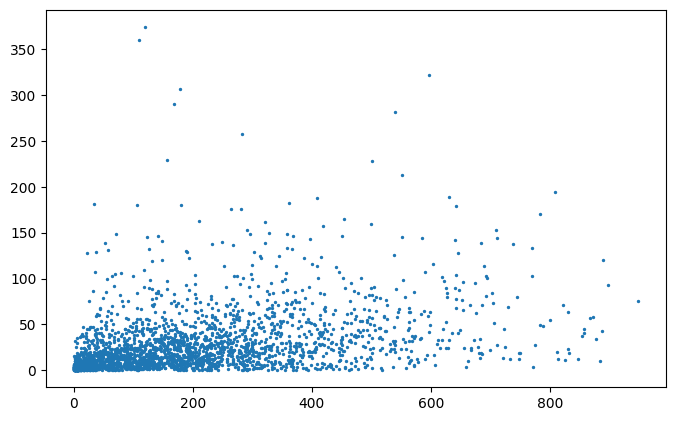

In [0]:
scatter_errors(y_test, y_pred)

# 단변수 예측 (univatiate)
## 선형 모델

In [0]:
count.shape

(10886,)

In [0]:
train = y[:7000]
test = y[7000:]

## 머신 러닝 모델에서 사용할 X, y 구조 생성

In [0]:
def split_data(data, n_steps):
    x, y = [], []
    for i in range(len(data)):
        if i > len(data) - n_steps - 1 : break
        x.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(x), np.array(y)

In [0]:
data = [1,2,3,4,5,6,7,8,9,10]
X_data, y_data = split_data(data, 3)
list(zip(X_data, y_data))

[(array([1, 2, 3]), 4),
 (array([2, 3, 4]), 5),
 (array([3, 4, 5]), 6),
 (array([4, 5, 6]), 7),
 (array([5, 6, 7]), 8),
 (array([6, 7, 8]), 9),
 (array([7, 8, 9]), 10)]

## 적절한 n_steps 찾기

In [0]:
for n_steps in range(1,24*30,24):
  train_x, train_y = split_data(train, n_steps)
  test_x, test_y = split_data(test, n_steps)
  lr= LinearRegression()
  lr.fit(train_x, train_y) 
  print(n_steps, lr.score(test_x, test_y).round(4))

1 0.6611
25 0.8681
49 0.8804
73 0.8855
97 0.8864
121 0.8892
145 0.8966
169 0.9013
193 0.9005
217 0.9015
241 0.902
265 0.9009
289 0.9011
313 0.9012
337 0.9013
361 0.9014
385 0.9023
409 0.9024
433 0.9023
457 0.9029
481 0.9025
505 0.9018
529 0.9015
553 0.901
577 0.9013
601 0.9015
625 0.9013
649 0.9011
673 0.8999
697 0.8992


In [0]:
n_steps = 10*24
train_x, train_y = split_data(train, n_steps)
test_x, test_y = split_data(test, n_steps)

0.9017100885901984


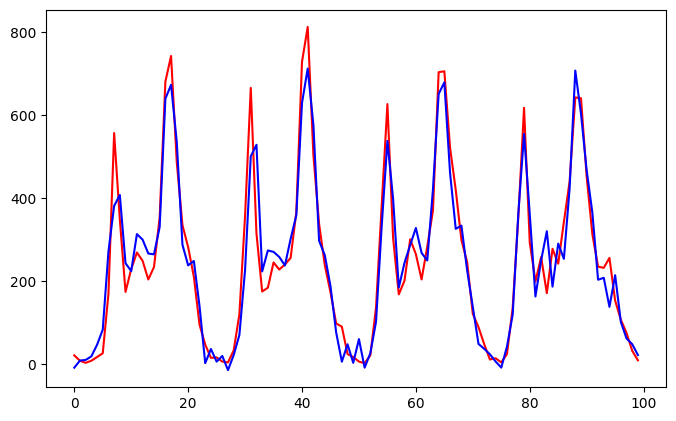

In [0]:
lr.fit(train_x, train_y) 
print(lr.score(test_x, test_y))
y_pred = lr.predict(test_x)
plot_y_pred(test_y[:100], y_pred[:100])

average= 47.87395662710875
max= 468.6451264822009


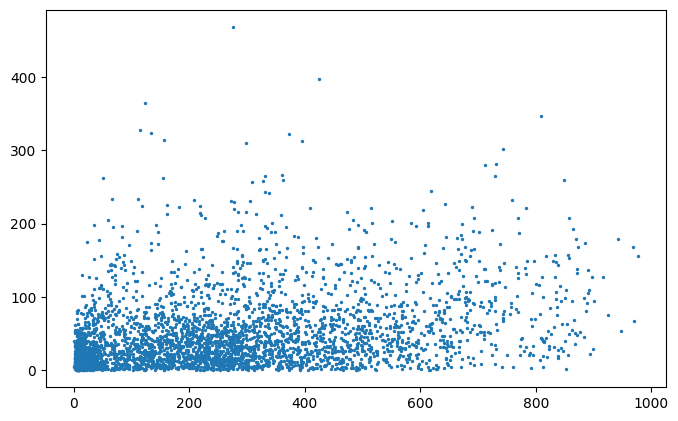

In [0]:
scatter_errors(test_y, y_pred)

## MLP (단변수)

In [0]:
n_steps = 24*10
train_x, train_y = split_data(train, n_steps)
test_x, test_y = split_data(test, n_steps)

In [0]:
model = Sequential()
model.add(Dense(300, activation='relu', input_dim=n_steps)) 
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(1))

In [0]:
model.compile(loss='mse',optimizer='adam')
history = model.fit(train_x,train_y, batch_size=20, epochs=200,
                                          validation_split=0.2, verbose=1,
callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)])





Train on 5408 samples, validate on 1352 samples
Epoch 1/200





5408/5408 [==============================] - 6s 1ms/step - loss: 5108.9222 - val_loss: 5183.2193
Epoch 2/200
5408/5408 [==============================] - 1s 268us/step - loss: 3190.8791 - val_loss: 4100.5863
Epoch 3/200
5408/5408 [==============================] - 1s 267us/step - loss: 2185.6424 - val_loss: 5521.1038
Epoch 4/200
5408/5408 [==============================] - 1s 269us/step - loss: 2046.7027 - val_loss: 2763.1697
Epoch 5/200
5408/5408 [==============================] - 1s 265us/step - loss: 1880.7456 - val_loss: 3018.2646
Epoch 6/200
5408/5408 [==============================] - 1s 266us/step - loss: 1672.2376 - val_loss: 2910.8747
Epoch 7/200
5408/5408 [==============================] - 1s 271us/step - loss: 1688.1112 - val_loss: 2812.0012
Epoch 8/200
5408/5408 [==============================] - 1s 263us/step - loss: 1550.3515 - val_loss: 2528.4235
Epoch 9/200
5408/5408 [==============================] - 

In [0]:
y_pred = model.predict(test_x)
r2_score(test_y, y_pred)

0.9024204925216605

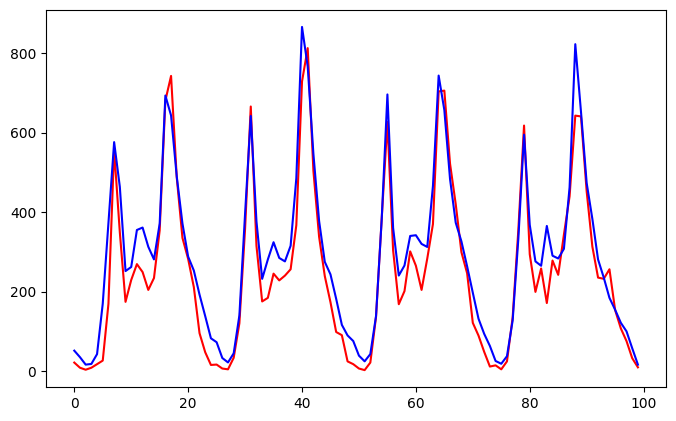

In [0]:
plot_y_pred(test_y[:100], y_pred[:100])

average= 48.70981497746278
max= 518.78125


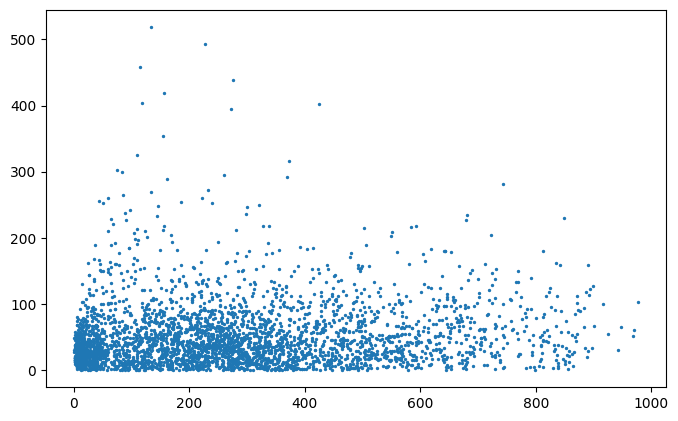

In [0]:
scatter_errors(test_y, y_pred[:,0])

## CNN (단변수)

In [0]:
n_steps =24*10
train_x, train_y = split_data(train, n_steps)
test_x, test_y = split_data(test, n_steps)

In [0]:

model = Sequential()
model.add(Reshape((n_steps,1), input_shape=(n_steps,)))
model.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps,1))) 
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 2))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 240, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 239, 64)           192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 119, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 118, 64)           8256      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 59, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 58, 128)           16512     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7424)            

In [0]:
model.compile(loss='mse',optimizer='adam')
history = model.fit(train_x, train_y, batch_size=20, epochs=200,
        validation_split=0.2, verbose=1,
callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)])

Train on 5408 samples, validate on 1352 samples
Epoch 1/200
5408/5408 [==============================] - 5s 983us/step - loss: 5837.8686 - val_loss: 7414.8625
Epoch 2/200
5408/5408 [==============================] - 2s 382us/step - loss: 3747.1973 - val_loss: 7083.9763
Epoch 3/200
5408/5408 [==============================] - 2s 393us/step - loss: 3192.4264 - val_loss: 4788.2583
Epoch 4/200
5408/5408 [==============================] - 2s 414us/step - loss: 2833.1150 - val_loss: 5310.3809
Epoch 5/200
5408/5408 [==============================] - 2s 426us/step - loss: 2615.0542 - val_loss: 4313.4689
Epoch 6/200
5408/5408 [==============================] - 2s 417us/step - loss: 2438.3932 - val_loss: 5762.2262
Epoch 7/200
5408/5408 [==============================] - 2s 433us/step - loss: 2349.2996 - val_loss: 4364.8266
Epoch 8/200
5408/5408 [==============================] - 2s 415us/step - loss: 2334.0164 - val_loss: 5678.0770
Epoch 9/200
5408/5408 [==============================] - 2s 422u

In [0]:
y_pred = model.predict(test_x)
r2_score(test_y, y_pred)

0.8359500447748798

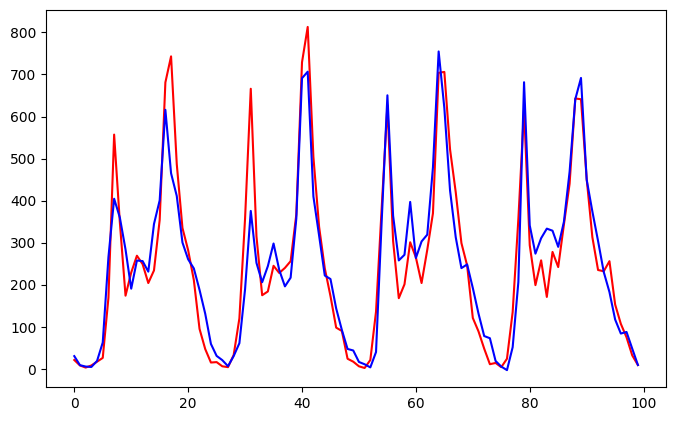

In [0]:
plot_y_pred(test_y[:100], y_pred[:100])

average= 58.44968890043582
max= 557.0272216796875


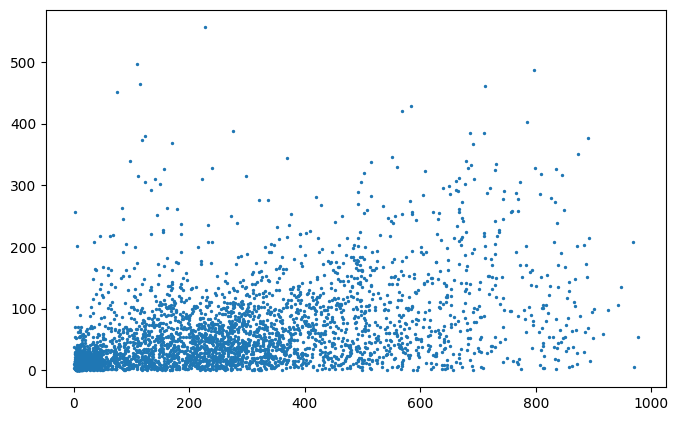

In [0]:
scatter_errors(test_y, y_pred[:,0])

## RNN (단변수)

In [0]:
n_steps =24
train_x, train_y = split_data(train, n_steps)
test_x, test_y = split_data(test, n_steps)

In [0]:
model = Sequential()
model.add(Reshape((n_steps,1), input_shape=(n_steps,)))
model.add(GRU(64, activation='elu', input_shape=(n_timesteps, 1), return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# model.summary()

In [0]:
model.compile(loss='mse',optimizer='adam')
history = model.fit(train_x, train_y, batch_size=20, epochs=200,
        validation_split=0.2, verbose=1,
callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)])

Train on 5580 samples, validate on 1396 samples
Epoch 1/200
5580/5580 [==============================] - 10s 2ms/step - loss: 6626.7047 - val_loss: 4939.1491
Epoch 2/200
5580/5580 [==============================] - 9s 2ms/step - loss: 2991.6224 - val_loss: 4678.6064
Epoch 3/200
5580/5580 [==============================] - 9s 2ms/step - loss: 2775.6752 - val_loss: 5206.4135
Epoch 4/200
5580/5580 [==============================] - 9s 2ms/step - loss: 2963.4634 - val_loss: 4449.8753
Epoch 5/200
5580/5580 [==============================] - 9s 2ms/step - loss: 2650.8985 - val_loss: 4498.3462
Epoch 6/200
5580/5580 [==============================] - 9s 2ms/step - loss: 2538.8617 - val_loss: 4071.0771
Epoch 7/200
5580/5580 [==============================] - 9s 2ms/step - loss: 2617.7353 - val_loss: 4522.1399
Epoch 8/200
5580/5580 [==============================] - 9s 2ms/step - loss: 2373.6923 - val_loss: 3468.7484
Epoch 9/200
5580/5580 [==============================] - 9s 2ms/step - loss: 22

In [0]:
y_pred = model.predict(test_x)
r2_score(test_y, y_pred)

0.881981964159749

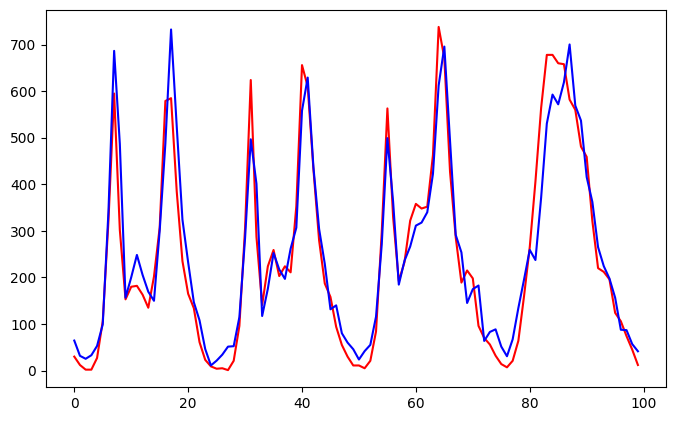

In [0]:
plot_y_pred(test_y[:100], y_pred[:100])

average= 51.953741291608296
max= 526.6481018066406


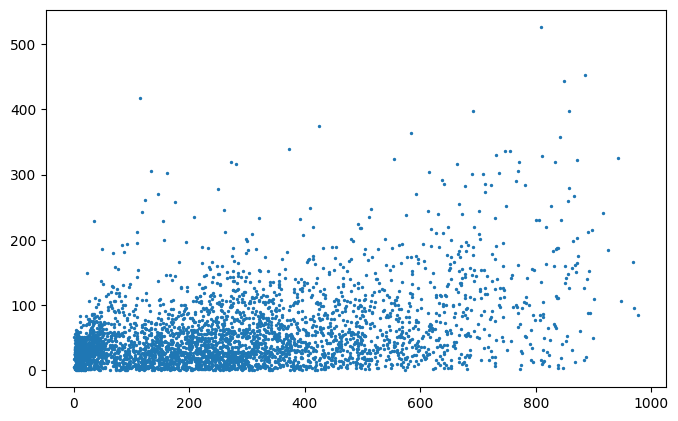

In [0]:
scatter_errors(test_y, y_pred[:,0])

# ARIMA 모델
- order: 트렌드를 모델링하는 파라미터 (p, d, q)
- seasonal order: 계절성을 모델링 (P, D, Q, m)
- trend: (‘n’, ‘c’, ‘t’, ‘ct’): trend, constant, linear, constant with linear trend

## Walk forward 방식 사용
- X, y를 미리 만들지 않는다


In [0]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pandas import read_csv

def sarima_forecast(history, config):
	order, sorder, trend = config
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	model_fit = model.fit(disp=False)
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]

def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	train, test = train_test_split(data, n_test)
	history = [x for x in train]
	for i in range(len(test)):
		yhat = sarima_forecast(history, cfg)
		# 예측치 리스트
		predictions.append(yhat)
		# 실제 값을 학습 데이터에 추가
		history.append(test[i])
	error = measure_rmse(test, predictions)
	return error

def score_model(data, n_test, cfg, debug=False):
	result = None
	key = str(cfg)
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		try:
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	scores = [r for r in scores if r[1] != None]
	# 에러가 작은 순으로 정렬
	scores.sort(key=lambda tup: tup[1])
	return scores

In [0]:
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
# 	p_params = [0, 1, 2]
# 	d_params = [0, 1]
# 	q_params = [0, 1, 2]
# 	t_params = ['n','c','t','ct']
# 	P_params = [0, 1, 2]
# 	D_params = [0, 1]
# 	Q_params = [0, 1, 2]
	p_params = [0]
	d_params = [0]
	q_params = [0]
	t_params = ['t']
	P_params = [1]
	D_params = [0, 1]
	Q_params = [0, 1]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models

In [0]:
# 시간상 일부만 사용
data = count[:1000]
n_test = 200
# data = count  # 10800
# n_test = 3000
cfg_list = sarima_configs(seasonal=[0, 24])
scores = grid_search(data, cfg_list, n_test)
for cfg, error in scores[:3]:
    print(cfg, error)

 > Model[[(0, 0, 0), (1, 0, 0, 0), 't']] 45.899
 > Model[[(0, 0, 0), (1, 0, 1, 0), 't']] 43.573
 > Model[[(0, 0, 0), (1, 0, 0, 24), 't']] 48.194
 > Model[[(0, 0, 0), (1, 0, 1, 24), 't']] 47.503
 > Model[[(0, 0, 0), (1, 1, 0, 24), 't']] 48.556
 > Model[[(0, 0, 0), (1, 1, 1, 24), 't']] 47.255
[(0, 0, 0), (1, 0, 1, 0), 't'] 43.57349819774796
[(0, 0, 0), (1, 0, 0, 0), 't'] 45.899281610192595
[(0, 0, 0), (1, 1, 1, 24), 't'] 47.25544987981729


In [0]:
cfg = [(0, 0, 0), (1, 0, 1, 0), 't']
predictions = list()
train, test = train_test_split(data, n_test)
# seed history with training dataset
history = [x for x in train]
filterwarnings("ignore")

for i in range(len(test)):
    yhat = sarima_forecast(history, cfg)
    predictions.append(yhat)
    history.append(test[i])
error = measure_rmse(test, predictions)
print(error)

43.57349819774796


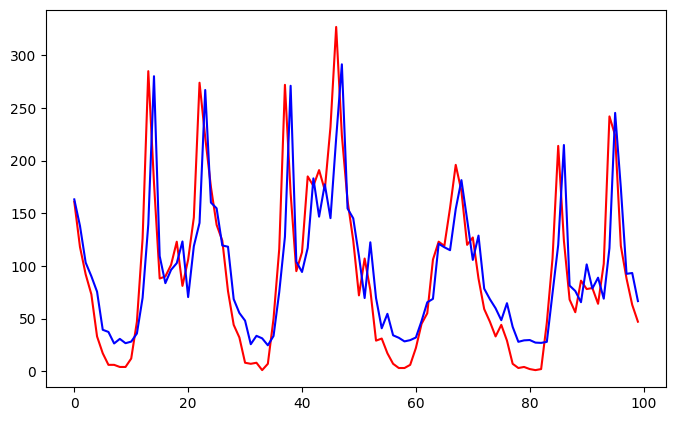

In [0]:
plot_y_pred(test[:100], predictions[:100])

average= 33.387256114740865
max= 145.49554975592727


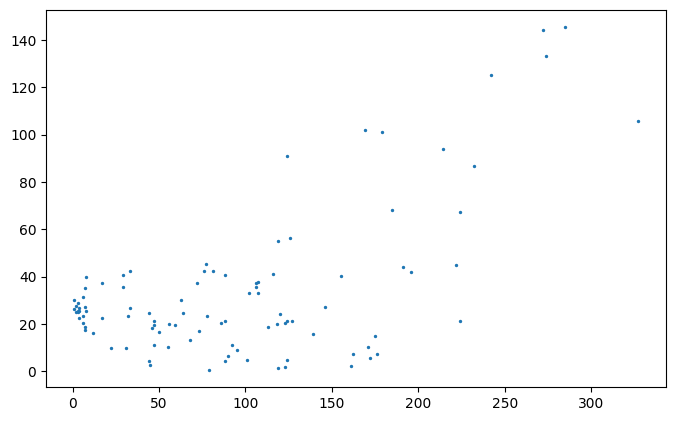

In [0]:
scatter_errors(test[:100], predictions[:100])

# 멀티 스텝 (univaiate)

## 멀티스텝 예측에 사용할 X, y 구조 생성

In [0]:
def split_sequence(sequence, n_steps_in, n_steps_out):
  X, y = [],[]
  for i in range(len(sequence)):
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    # 마지막 값이 범위 내에 있는지 확인
    if out_end_ix > len(sequence):
        break
    seq_x, seq_y = sequence[i:end_ix], sequence[out_end_ix-1]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [0]:
data = [1,2,3,4,5,6,7,8,9,10]
n_steps_in, n_steps_out = 3, 3
X, y = split_sequence(data, n_steps_in, n_steps_out)
for i in range(len(X)):
  print(X[i], y[i])

[1 2 3] 6
[2 3 4] 7
[3 4 5] 8
[4 5 6] 9
[5 6 7] 10


## 훈련 데이터와 테스트 데이터

In [0]:
train = count[:7000].values
test = count[7000:].values

In [0]:
train.shape, test.shape

((7000,), (3886,))

In [0]:
train_x, train_y = split_sequence(train, 3, 4)

In [0]:
train_x[:15], train_y[:15]

(array([[ 16,  40,  32],
        [ 40,  32,  13],
        [ 32,  13,   1],
        [ 13,   1,   1],
        [  1,   1,   2],
        [  1,   2,   3],
        [  2,   3,   8],
        [  3,   8,  14],
        [  8,  14,  36],
        [ 14,  36,  56],
        [ 36,  56,  84],
        [ 56,  84,  94],
        [ 84,  94, 106],
        [ 94, 106, 110],
        [106, 110,  93]]),
 array([  2,   3,   8,  14,  36,  56,  84,  94, 106, 110,  93,  67,  35,
         37,  36]))

In [0]:
lr = LinearRegression()
n_steps = 24*10
for n_steps_out in range(24,24*8,24):
  train_x, train_y = split_sequence(train, n_steps, n_steps_out)
  test_x, test_y = split_sequence(test, n_steps, n_steps_out)
  lr.fit(train_x, train_y) 
  print(n_steps_out, ',', lr.score(test_x, test_y).round(3))

24 , 0.755
48 , 0.711
72 , 0.71
96 , 0.713
120 , 0.716
144 , 0.726
168 , 0.724


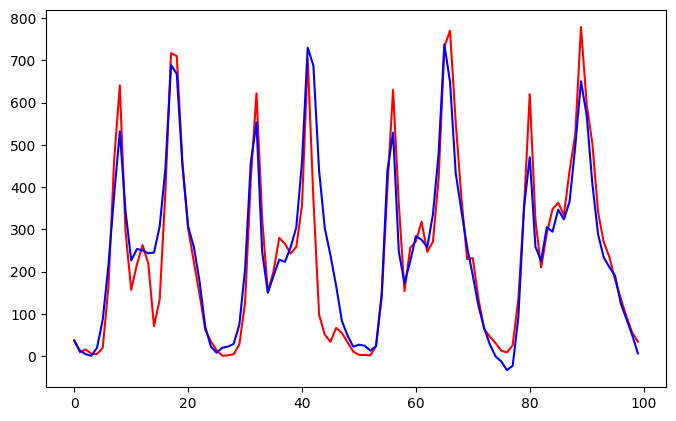

In [0]:
y_pred = lr.predict(test_x)
plot_y_pred(test_y[:100], y_pred[:100])

average= 82.17696896852357
max= 553.068294497697


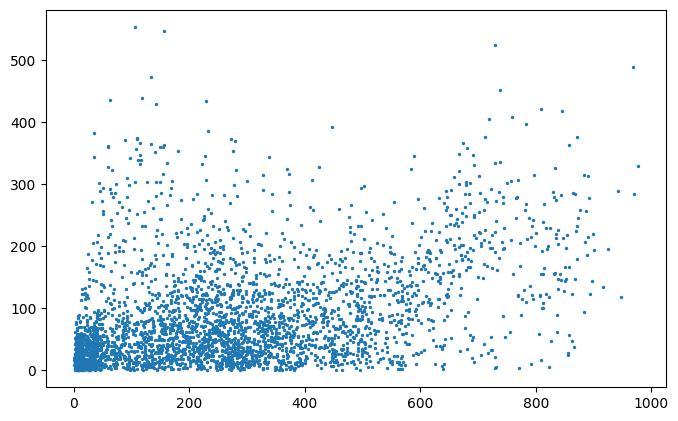

In [0]:
scatter_errors(test_y, y_pred)

## MLP (멀티스텝)

In [0]:
n_steps = 24*10
n_steps_out = 24 * 7
train_x, train_y = split_sequence(train, n_steps, n_steps_out)
test_x, test_y = split_sequence(test, n_steps, n_steps_out)

In [0]:
model = Sequential()
model.add(Dense(300, activation='relu', input_shape=(n_steps,))) 
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(1))

In [0]:
model.compile(loss='mse',optimizer='adam')
history = model.fit(train_x,train_y, batch_size=20, epochs=200,
                                          validation_split=0.2, verbose=1,
callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)])





Train on 5274 samples, validate on 1319 samples
Epoch 1/200





5274/5274 [==============================] - 7s 1ms/step - loss: 9304.7884 - val_loss: 12665.7281
Epoch 2/200
5274/5274 [==============================] - 1s 247us/step - loss: 7178.1630 - val_loss: 11546.6098
Epoch 3/200
5274/5274 [==============================] - 1s 242us/step - loss: 6721.5950 - val_loss: 16068.3463
Epoch 4/200
5274/5274 [==============================] - 1s 252us/step - loss: 6707.1220 - val_loss: 12605.5889
Epoch 5/200
5274/5274 [==============================] - 1s 267us/step - loss: 6267.0744 - val_loss: 14549.4436
Epoch 6/200
5274/5274 [==============================] - 1s 258us/step - loss: 6154.3651 - val_loss: 13156.4464
Epoch 7/200
5274/5274 [==============================] - 1s 232us/step - loss: 5903.6894 - val_loss: 12765.1559
Epoch 8/200
5274/5274 [==============================] - 1s 233us/step - loss: 5653.7980 - val_loss: 11864.2122


In [0]:
y_pred = model.predict(test_x)
r2_score(test_y, y_pred)

0.7021639913533806

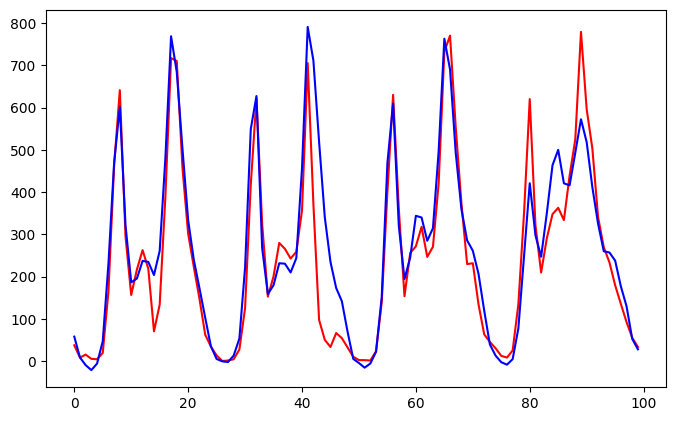

In [0]:
plot_y_pred(test_y[:100], y_pred[:100])

average= 83.00230913823638
max= 581.830078125


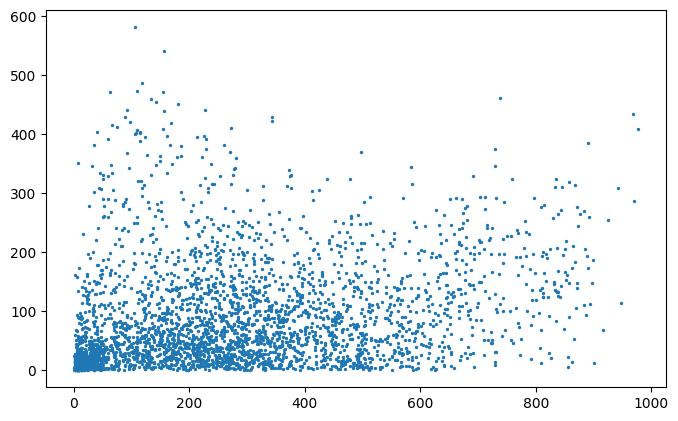

In [0]:
scatter_errors(test_y, y_pred[:,0])

## CNN  (멀티스텝)

In [0]:
n_steps =24*10
n_steps_out = 24*7
train_x, train_y = split_sequence(train, n_steps, n_steps_out)
test_x, test_y = split_sequence(test, n_steps, n_steps_out)

In [0]:

model = Sequential()
model.add(Reshape((n_steps,1), input_shape=(n_steps,)))
model.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps,1))) 
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 2))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 240, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 239, 64)           192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 119, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 118, 64)           8256      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 59, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 58, 128)           16512     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7424)            

model.compile(loss='mse',optimizer='adam')
history = model.fit(train_x, train_y, batch_size=20, epochs=200,
        validation_split=0.2, verbose=1,
callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)])

In [0]:
y_pred = model.predict(test_x)
r2_score(test_y, y_pred)

0.6917621217971865

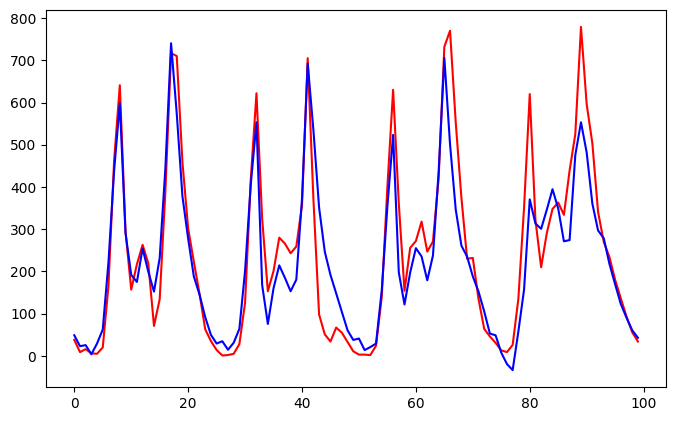

In [0]:
plot_y_pred(test_y[:100], y_pred[:100])

average= 86.25146932188517
max= 541.565185546875


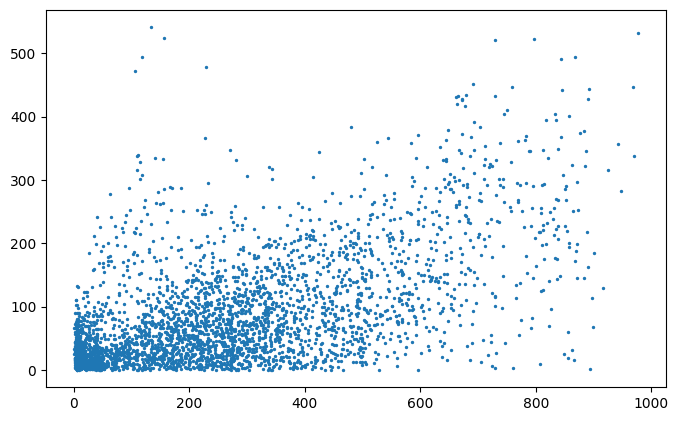

In [0]:
scatter_errors(test_y, y_pred[:,0])

## RNN  (멀티스텝)

In [0]:
n_steps =24*10
n_steps_out = 24*7
train_x, train_y = split_sequence(train, n_steps, n_steps_out)
test_x, test_y = split_sequence(test, n_steps, n_steps_out)

In [0]:
model = Sequential()
model.add(Reshape((n_steps,1), input_shape=(n_steps,)))
model.add(GRU(64, activation='elu', input_shape=(n_timesteps, 1), return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [0]:
model.compile(loss='mse',optimizer='adam')
history = model.fit(train_x, train_y, batch_size=20, epochs=200,
        validation_split=0.2, verbose=1,
callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5274 samples, validate on 1319 samples
Epoch 1/200
5274/5274 [==============================] - 114s 22ms/step - loss: 9379.5351 - val_loss: 13963.3434
Epoch 2/200
5274/5274 [==============================] - 112s 21ms/step - loss: 7954.9590 - val_loss: 13144.6217
Epoch 3/200
5274/5274 [==============================] - 115s 22ms/step - loss: 7754.0400 - val_loss: 13901.5416
Epoch 4/200
5274/5274 [==============================] - 114s 22ms/step - loss: 7732.4957 - val_loss: 13340.4054
Epoch 5/200
5274/5274 [==============================] - 114s 22ms/step - loss: 7782.8047 - val_loss: 12948.8644
Epoch 6/200
5274/5274 [==============================] - 114s 22ms/step - loss: 7587.6694 - val_loss: 13078.1773
Epoch 7/200
5274/5274 [==============================] - 113s 21ms/step - loss: 7549.4775 - val_loss: 12419.5394
Epoch 8/200
5274/5274 [==============================] - 110s 21ms/

In [0]:
y_pred = model.predict(test_x)
r2_score(test_y, y_pred)

0.881981964159749

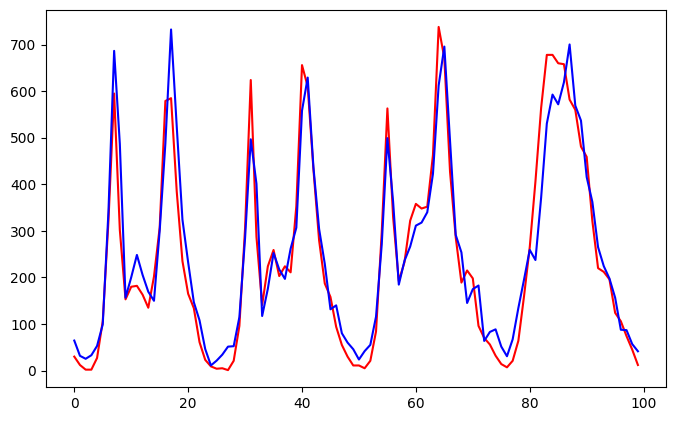

In [0]:
plot_y_pred(test_y[:100], y_pred[:100])

average= 51.953741291608296
max= 526.6481018066406


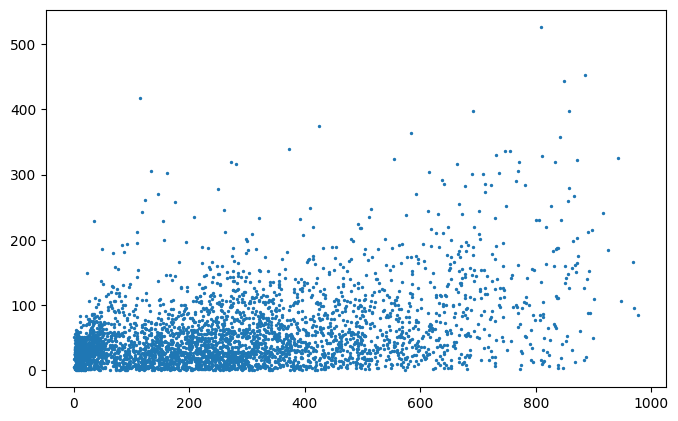

In [0]:
scatter_errors(test_y, y_pred[:,0])

# 다중변수 예측 (멀티 스텝) - 옵션

In [0]:
features = ["count", "temp", "humidity","season", "workingday",  "d-year", "d-hour"]
continuous_features = ["count", "temp", "humidity"]
discrete_features = ["season", "workingday", "d-year", "d-hour"]
X2 = df[features]

In [0]:
X2.nunique()

count         822
temp           49
humidity       89
season          4
workingday      2
d-year          2
d-hour         24
dtype: int64

In [0]:
X = pd.get_dummies(X2, columns = discrete_features)
X[:3]

,count,temp,humidity,season_1,season_2,season_3,season_4,workingday_0,workingday_1,d-year_2011,d-year_2012,d-hour_0,d-hour_1,d-hour_2,d-hour_3,d-hour_4,d-hour_5,d-hour_6,d-hour_7,d-hour_8,d-hour_9,d-hour_10,d-hour_11,d-hour_12,d-hour_13,d-hour_14,d-hour_15,d-hour_16,d-hour_17,d-hour_18,d-hour_19,d-hour_20,d-hour_21,d-hour_22,d-hour_23
0,16,9.84,81,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,40,9.02,80,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,32,9.02,80,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
sc = StandardScaler()
X[continuous_features] = sc.fit_transform(X[continuous_features])
X[:3]

,count,temp,humidity,season_1,season_2,season_3,season_4,workingday_0,workingday_1,d-year_2011,d-year_2012,d-hour_0,d-hour_1,d-hour_2,d-hour_3,d-hour_4,d-hour_5,d-hour_6,d-hour_7,d-hour_8,d-hour_9,d-hour_10,d-hour_11,d-hour_12,d-hour_13,d-hour_14,d-hour_15,d-hour_16,d-hour_17,d-hour_18,d-hour_19,d-hour_20,d-hour_21,d-hour_22,d-hour_23
0,-0.969294,-1.333661,0.993213,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.836797,-1.438907,0.941249,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.880962,-1.438907,0.941249,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# 표준 스케일링 변수 (표준편차와 평균)
sc.scale_, sc.mean_

(array([181.13613357,   7.79123196,  19.24414932]),
 array([191.57413191,  20.23085982,  61.88645967]))

In [0]:
count_sigma = sc.scale_[0]
count_mean = sc.mean_[0]
count_sigma, count_mean

(181.1361335742659, 191.57413191254824)

In [0]:
def split_sequence(sequence, n_steps_in, n_steps_out):
  X, y = [],[]
  for i in range(len(sequence)):
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    # 마지막 값이 범위 내에 있는지 확인
    if out_end_ix > len(sequence):
        break
    seq_x, seq_y = sequence[i:end_ix], sequence[out_end_ix-1]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [0]:
train = X[:7000].values
test = X[7000:].values

In [0]:
train.shape, test.shape

((7000, 35), (3886, 35))

In [0]:
n_steps = 24*10
n_steps_out = 24 * 7
train_x, train_y = split_sequence(train, n_steps, n_steps_out)
test_x, test_y = split_sequence(test, n_steps, n_steps_out)

In [0]:
train_x.shape, train_y.shape

((6593, 240, 35), (6593, 35))

In [0]:
train_y = train_y[:,0]
test_y = test_y[:,0]

In [0]:
train_x.shape, train_y.shape

((6593, 240, 35), (6593,))

In [0]:
n_features = train_x.shape[-1]
n_features

35

## MLP (다중변수 멀티스텝)

In [0]:
model = Sequential()
model.add(Reshape((n_steps*n_features,), input_shape=(n_steps, n_features))) 
model.add(Dense(300, activation='relu', input_shape=(n_steps*n_features,))) 
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(1))


In [0]:
model.compile(loss='mse',optimizer='adam')
history = model.fit(train_x,train_y, batch_size=20, epochs=200,
                                          validation_split=0.2, verbose=1,
callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)])





Train on 5274 samples, validate on 1319 samples
Epoch 1/200





5274/5274 [==============================] - 4s 709us/step - loss: 0.3073 - val_loss: 1.0833
Epoch 2/200
5274/5274 [==============================] - 3s 502us/step - loss: 0.2107 - val_loss: 0.8722
Epoch 3/200
5274/5274 [==============================] - 3s 503us/step - loss: 0.1830 - val_loss: 0.9357
Epoch 4/200
5274/5274 [==============================] - 3s 496us/step - loss: 0.1554 - val_loss: 0.9156
Epoch 5/200
5274/5274 [==============================] - 3s 494us/step - loss: 0.1328 - val_loss: 0.8992
Epoch 6/200
5274/5274 [==============================] - 3s 495us/step - loss: 0.1217 - val_loss: 0.9209
Epoch 7/200
5274/5274 [==============================] - 3s 496us/step - loss: 0.1110 - val_loss: 1.1274
Epoch 8/200
5274/5274 [==============================] - 3s 494us/step - loss: 0.0952 - val_loss: 1.2446


0.5782436772344566


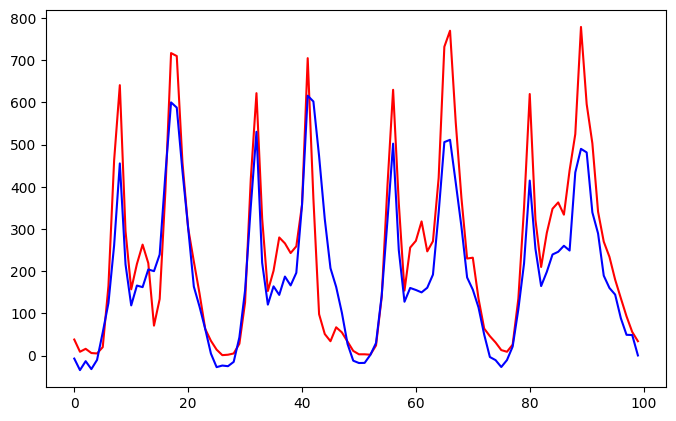

In [0]:
y_pred = model.predict(test_x)
print(r2_score(test_y, y_pred))
plot_y_pred(test_y[:100]*count_sigma+count_mean, y_pred[:100]*count_sigma+count_mean)

In [0]:
count_mean

191.57413191254824

average= 102.99036624795508
max= 595.6167449951172


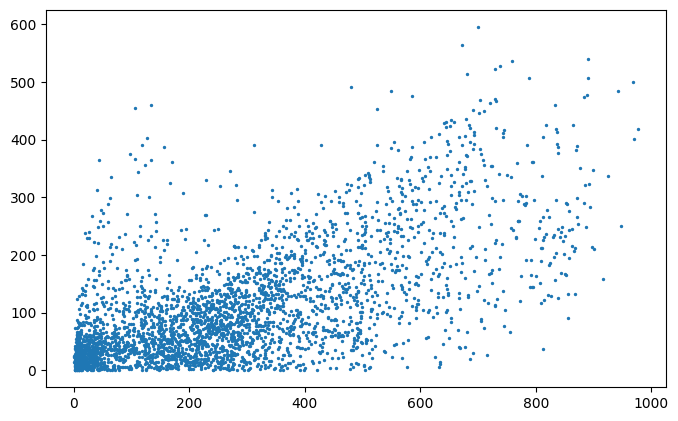

In [0]:
scatter_errors(test_y*count_sigma+count_mean, y_pred[:,0]*count_sigma+count_mean)

## CNN (다중변수 멀티스텝)

In [0]:
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps,n_features))) 
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 2))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 2))
model.add(Dropout(0.5))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 2))
model.add(MaxPooling1D(2))
model.add(Conv1D(256, 2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 239, 64)           4544      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 119, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 118, 64)           8256      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 59, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 58, 128)           16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 58, 128)           0         
___

In [0]:
model.compile(loss='mse',optimizer='adam')
history = model.fit(train_x, train_y, batch_size=20, epochs=200,
        validation_split=0.2, verbose=1,
callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)])

Train on 5274 samples, validate on 1319 samples
Epoch 1/200
5274/5274 [==============================] - 5s 954us/step - loss: 0.3403 - val_loss: 0.5221
Epoch 2/200
5274/5274 [==============================] - 3s 504us/step - loss: 0.2459 - val_loss: 0.6799
Epoch 3/200
5274/5274 [==============================] - 3s 556us/step - loss: 0.2166 - val_loss: 0.6948
Epoch 4/200
5274/5274 [==============================] - 3s 593us/step - loss: 0.2019 - val_loss: 0.6717
Epoch 5/200
5274/5274 [==============================] - 3s 596us/step - loss: 0.1948 - val_loss: 0.6001
Epoch 6/200
5274/5274 [==============================] - 3s 596us/step - loss: 0.1862 - val_loss: 0.7001
Epoch 7/200
5274/5274 [==============================] - 3s 596us/step - loss: 0.1743 - val_loss: 0.6060


0.6184726244327661


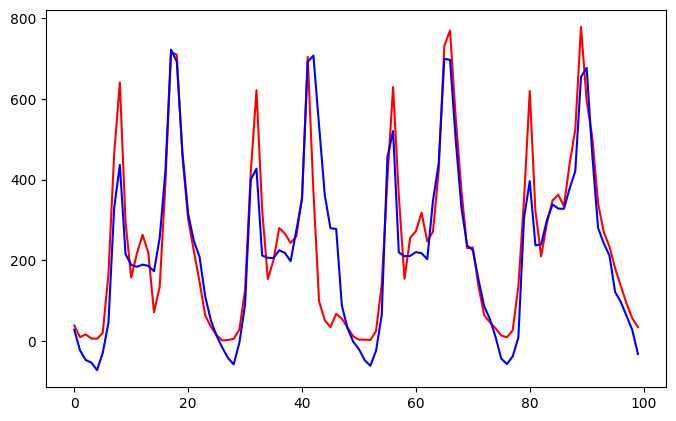

In [0]:
y_pred = model.predict(test_x)
print(r2_score(test_y, y_pred))
plot_y_pred(test_y[:100]*count_sigma+count_mean, y_pred[:100]*count_sigma+count_mean)

average= 97.03804135630959
max= 612.9048919677734


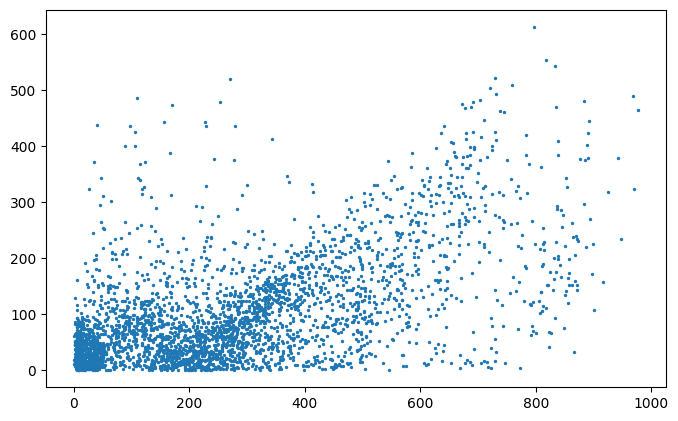

In [0]:
scatter_errors(test_y*count_sigma+count_mean, y_pred[:,0]*count_sigma+count_mean)

## RNN (다중변수 멀티스텝)

In [0]:
features = ["count", "temp", "d-hour"]
continuous_features = ["count", "temp"]
discrete_features = ["d-hour"]
# X2 = df["count"]
X2 = df[features]

In [0]:
X2.nunique()

count     822
temp       49
d-hour     24
dtype: int64

In [0]:
model = Sequential()
model.add(GRU(64, activation='relu', input_shape=(n_steps, n_features), return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(64, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 240, 64)           17472     
_________________________________________________________________
dropout_1 (Dropout)          (None, 240, 64)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                24768     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 42,305
Trainable params: 42,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse',optimizer='adam')
history = model.fit(train_x, train_y, batch_size=20, epochs=200,
        validation_split=0.2, verbose=1,
callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5389 samples, validate on 1348 samples
Epoch 1/200
5389/5389 [==============================] - 228s 42ms/step - loss: 0.2324 - val_loss: 0.3429
Epoch 2/200
5389/5389 [==============================] - 229s 42ms/step - loss: 0.1833 - val_loss: 0.3668
Epoch 3/200
5389/5389 [==============================] - 228s 42ms/step - loss: 0.1784 - val_loss: 0.3135
Epoch 4/200
5389/5389 [==============================] - 227s 42ms/step - loss: 0.1755 - val_loss: 0.3282
Epoch 5/200
5389/5389 [==============================] - 227s 42ms/step - loss: 0.1729 - val_loss: 0.3156
Epoch 6/200
5389/5389 [==============================] - 229s 43ms/step - loss: 0.1722 - val_loss: 0.3171
Epoch 7/200
5389/5389 [==============================] - 232s 43ms/step - loss: 0.1698 - val_loss: 0.3330
Epoch 8/200
5389/5389 [==============================] - 230s 43ms/step - loss: 0.1701 - val_loss: 0.3122
Epoch 9/20

0.5583290483214496


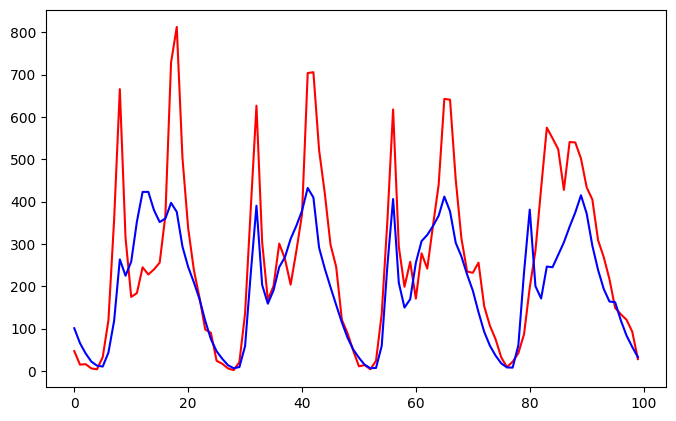

In [0]:
y_pred = model.predict(test_x)
print(r2_score(test_y, y_pred))
plot_y_pred(test_y[:100]*count_sigma+count_mean, y_pred[:100]*count_sigma+count_mean)

average= 99.66713782196508
max= 629.3436889648438


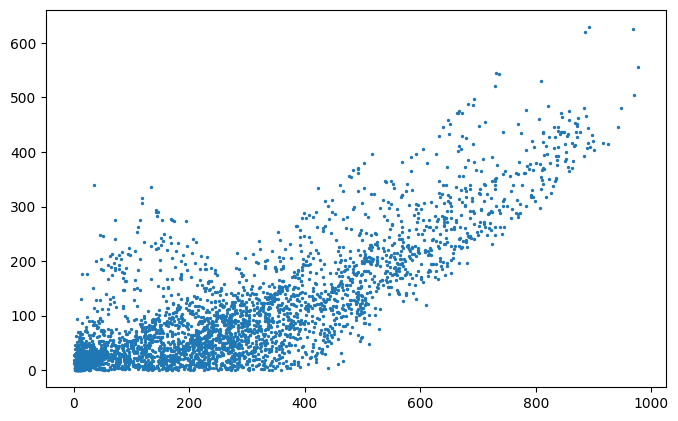

In [0]:
scatter_errors(test_y*count_sigma+count_mean, y_pred[:,0]*count_sigma+count_mean)

In [0]:
features = ["count", "temp", "humidity","season", "workingday",  "d-year", "d-hour"]
continuous_features = ["count", "temp", "humidity"]
discrete_features = ["season", "workingday", "d-year", "d-hour"]
X2 = df[features]

In [0]:
X2.nunique()

count         822
temp           49
humidity       89
season          4
workingday      2
d-year          2
d-hour         24
dtype: int64

In [0]:
model = Sequential()
model.add(GRU(64, activation='relu', input_shape=(n_steps, n_features), return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(64, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 240, 64)           19200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 240, 64)           0         
_________________________________________________________________
gru_4 (GRU)                  (None, 64)                24768     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 44,033
Trainable params: 44,033
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse',optimizer='adam')
history = model.fit(train_x, train_y, batch_size=20, epochs=200,
        validation_split=0.2, verbose=1,
callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)])

Train on 5274 samples, validate on 1319 samples
Epoch 1/200
5274/5274 [==============================] - 252s 48ms/step - loss: 0.2907 - val_loss: 0.6047
Epoch 2/200
5274/5274 [==============================] - 252s 48ms/step - loss: 0.2175 - val_loss: 0.5104
Epoch 3/200
5274/5274 [==============================] - 256s 49ms/step - loss: 0.2055 - val_loss: 0.5384
Epoch 4/200
5274/5274 [==============================] - 255s 48ms/step - loss: 0.2017 - val_loss: 0.5026
Epoch 5/200
5274/5274 [==============================] - 251s 48ms/step - loss: 0.1959 - val_loss: 0.5235
Epoch 6/200
5274/5274 [==============================] - 253s 48ms/step - loss: 0.1905 - val_loss: 0.5440
Epoch 7/200
5274/5274 [==============================] - 251s 48ms/step - loss: 0.1865 - val_loss: 0.5497
Epoch 8/200
5274/5274 [==============================] - 252s 48ms/step - loss: 0.1861 - val_loss: 0.5443
Epoch 9/200
5274/5274 [==============================] - 252s 48ms/step - loss: 0.1775 - val_loss: 0.531

0.42197701176059


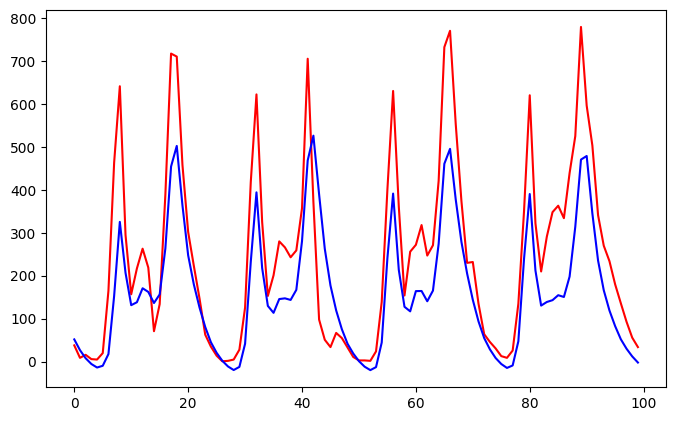

In [0]:
y_pred = model.predict(test_x)
print(r2_score(test_y, y_pred))
plot_y_pred(test_y[:100]*count_sigma+count_mean, y_pred[:100]*count_sigma+count_mean)

average= 120.74321902966697
max= 638.1828918457031


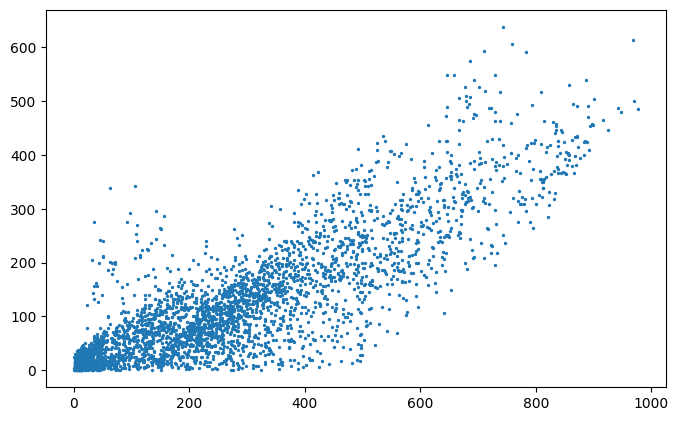

In [0]:
scatter_errors(test_y*count_sigma+count_mean, y_pred[:,0]*count_sigma+count_mean)

## 개선된 모델 (R squared: 0.7)

In [0]:
model = Sequential()
model.add(SimpleRNN(256, activation='elu', input_shape=(n_steps, n_features), return_sequences=True))
model.add(Dropout(0.3))
model.add(SimpleRNN(128, activation='elu', return_sequences=True))
model.add(Dropout(0.3))
model.add(SimpleRNN(64, activation='elu'))
model.add(Dense(1))